In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./data/final_final_final.csv')

In [3]:
data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)

In [4]:
data

,session_id,mellon_id,player_id,event_result,task,Primary code,event_start_time,revise_score,high_performance,female_members,female_maj,gender,ethnicity,application_status,first_generation,urm,first_language
0,7298_PartyVenue,173442,"{'userID1': '202618', 'nickname1': 'bean boi',...",what's up lads,PartyVenue,SMC,2019-09-28 17:11:18+00:00,0.0,0,4,1,F,Unknown / declined to state,Sophomore,0.0,0.0,English only
1,7298_PartyVenue,202618,"{'userID1': '202618', 'nickname1': 'bean boi',...",hello,PartyVenue,SMC,2019-09-28 17:11:26+00:00,0.0,0,4,1,F,Asian / Asian American,Freshman,1.0,0.0,Non-English
2,7298_PartyVenue,163093,"{'userID1': '202618', 'nickname1': 'bean boi',...",hi its too early for this,PartyVenue,SMC,2019-09-28 17:11:29+00:00,0.0,0,4,1,F,Asian / Asian American,Freshman,1.0,0.0,English/non-English
3,7298_PartyVenue,173442,"{'userID1': '202618', 'nickname1': 'bean boi',...",bean boi i like ur name,PartyVenue,SMC,2019-09-28 17:11:32+00:00,0.0,0,4,1,F,Unknown / declined to state,Sophomore,0.0,0.0,English only
4,7298_PartyVenue,202618,"{'userID1': '202618', 'nickname1': 'bean boi',...",thanks,PartyVenue,SMC,2019-09-28 17:11:35+00:00,0.0,0,4,1,F,Asian / Asian American,Freshman,1.0,0.0,Non-English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7363,7371_candidate,Isabella,"{'userID1': '187876', 'nickname1': 'Sabrina', ...",yes,candidate,SN,2019-10-03 23:18:38+00:00,0.0,0,3,1,Unknown / declined to state,Unknown / declined to state,Unknown / declined to state,Unknown / declined to state,Unknown / declined to state,Unknown / declined to state
7364,7371_candidate,180275,"{'userID1': '187876', 'nickname1': 'Sabrina', ...",I agree,candidate,SN,2019-10-03 23:18:43+00:00,0.0,0,3,1,F,International student,Freshman,0.0,0.0,Non-English
7365,7371_candidate,Isabella,"{'userID1': '187876', 'nickname1': 'Sabrina', ...","okay, we're good to submit then ?",candidate,CE,2019-10-03 23:18:54+00:00,0.0,0,3,1,Unknown / declined to state,Unknown / declined to state,Unknown / declined to state,Unknown / declined to state,Unknown / declined to state,Unknown / declined to state
7366,7371_candidate,195466,"{'userID1': '187876', 'nickname1': 'Sabrina', ...",yes,candidate,SN,2019-10-03 23:18:55+00:00,0.0,0,3,1,F,Hispanic,Junior,0.0,1.0,Non-English


In [7]:
len(data.mellon_id.unique())

514

In [8]:
len(data.session_id.unique())

129

# Code frequencies

In [6]:
data['Primary code '].value_counts()

SSI     2638
SESU    1209
SMC     1166
SN       875
CRF      597
CE       440
CM       390
CP        38
TD         8
EM         7
Name: Primary code , dtype: int64

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


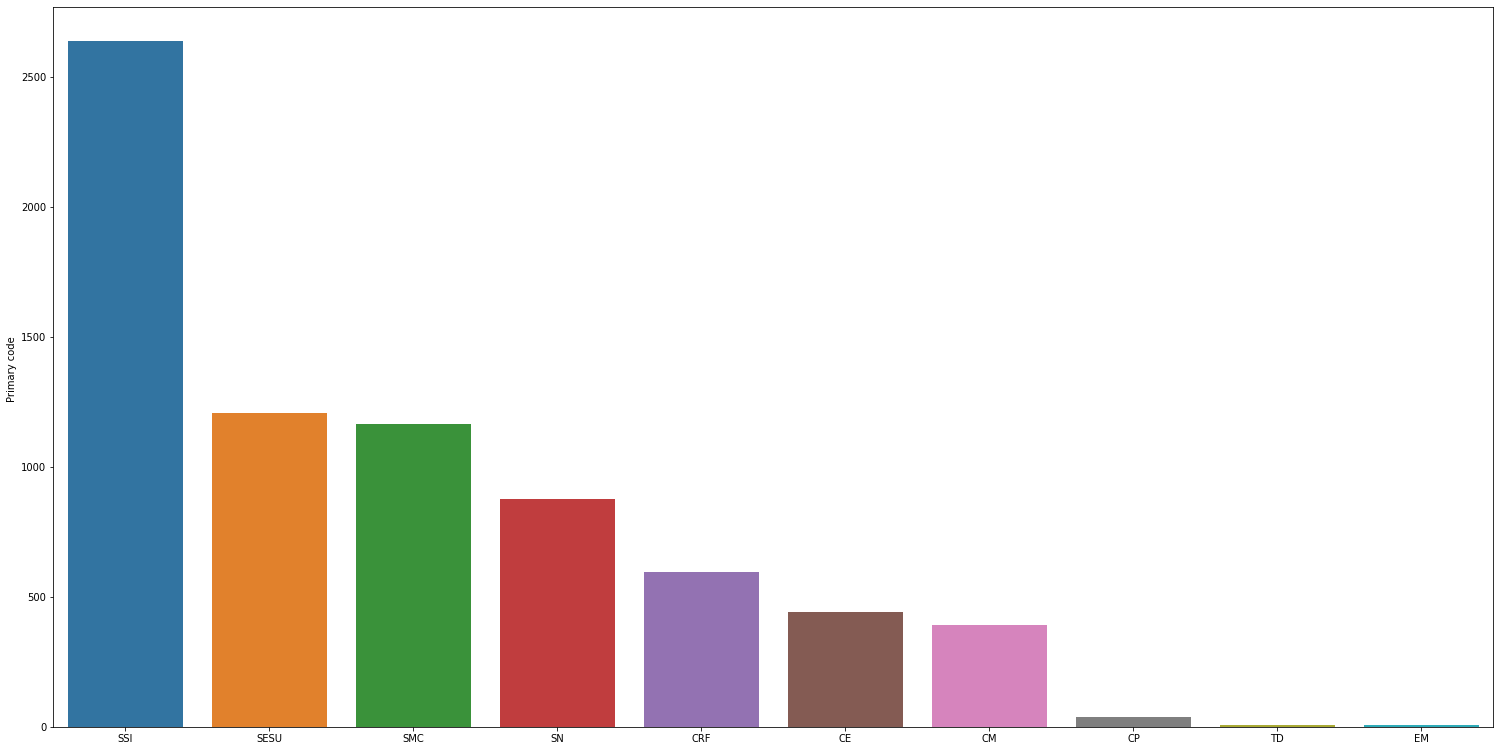

In [7]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_axes([0,0,1,1])
k = data['Primary code '].value_counts().index
val = data['Primary code '].value_counts()
sns.barplot(k, val)
plt.show()

# Female majority

In [8]:
data.groupby(['session_id']).female_maj.max().value_counts()

1    81
0    48
Name: female_maj, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


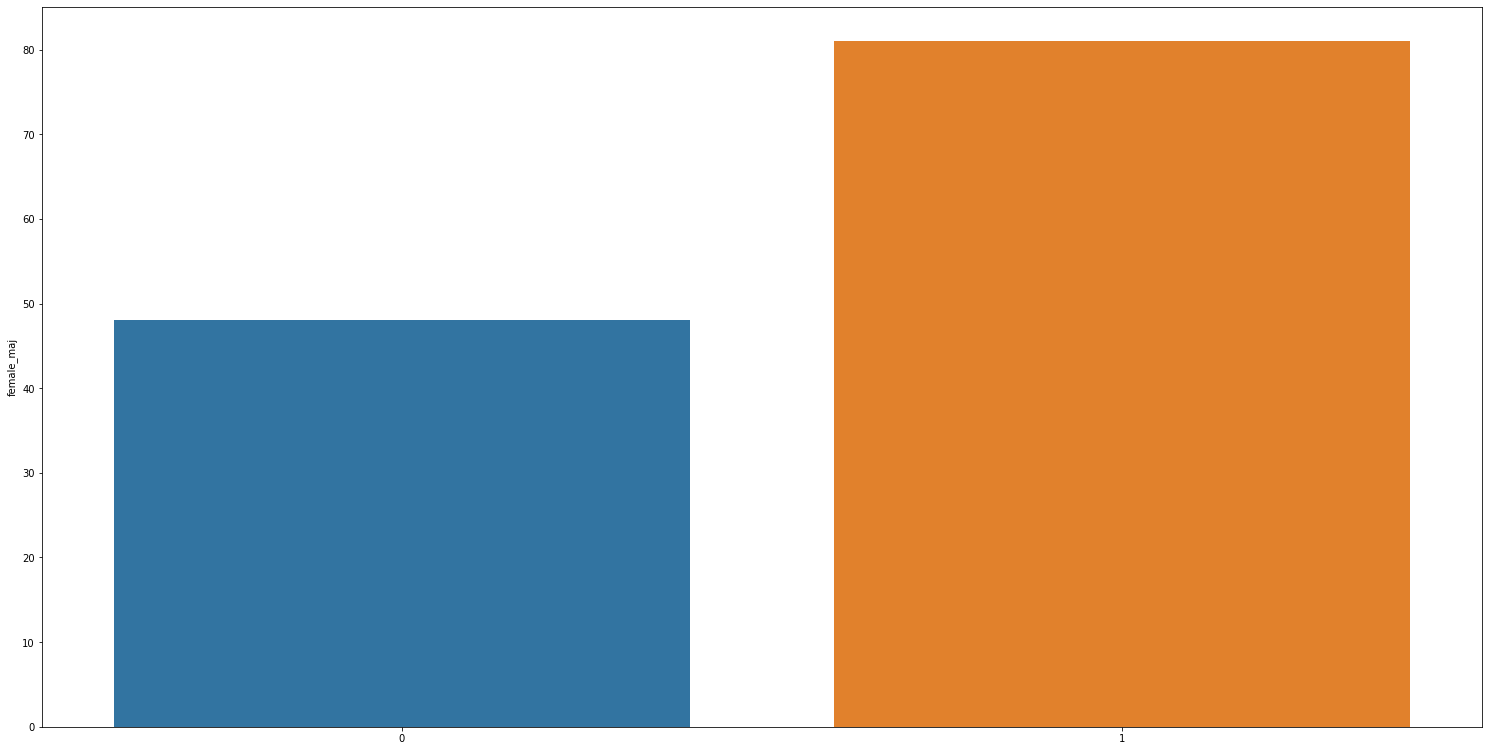

In [9]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_axes([0,0,1,1])
k = data.groupby(['session_id']).female_maj.max().value_counts().index
val = data.groupby(['session_id']).female_maj.max().value_counts()
sns.barplot(k, val)
plt.show()

# Race

In [10]:
data['ethnicity'] = data['ethnicity'].replace('Unknown', 'Unknown / declined to state')

data.groupby(['mellon_id']).ethnicity.max().value_counts()

Asian / Asian American               209
Hispanic                             162
White, non-Hispanic                   62
International student                 33
Unknown / declined to state           29
Black, non-Hispanic                    9
Two or more ethnicities, with URM      9
Pacific Islander                       1
Name: ethnicity, dtype: int64

In [11]:
[x/514 for x in data.groupby(['mellon_id']).ethnicity.max().value_counts()]

[0.4066147859922179,
 0.3151750972762646,
 0.12062256809338522,
 0.06420233463035019,
 0.05642023346303502,
 0.017509727626459144,
 0.017509727626459144,
 0.0019455252918287938]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


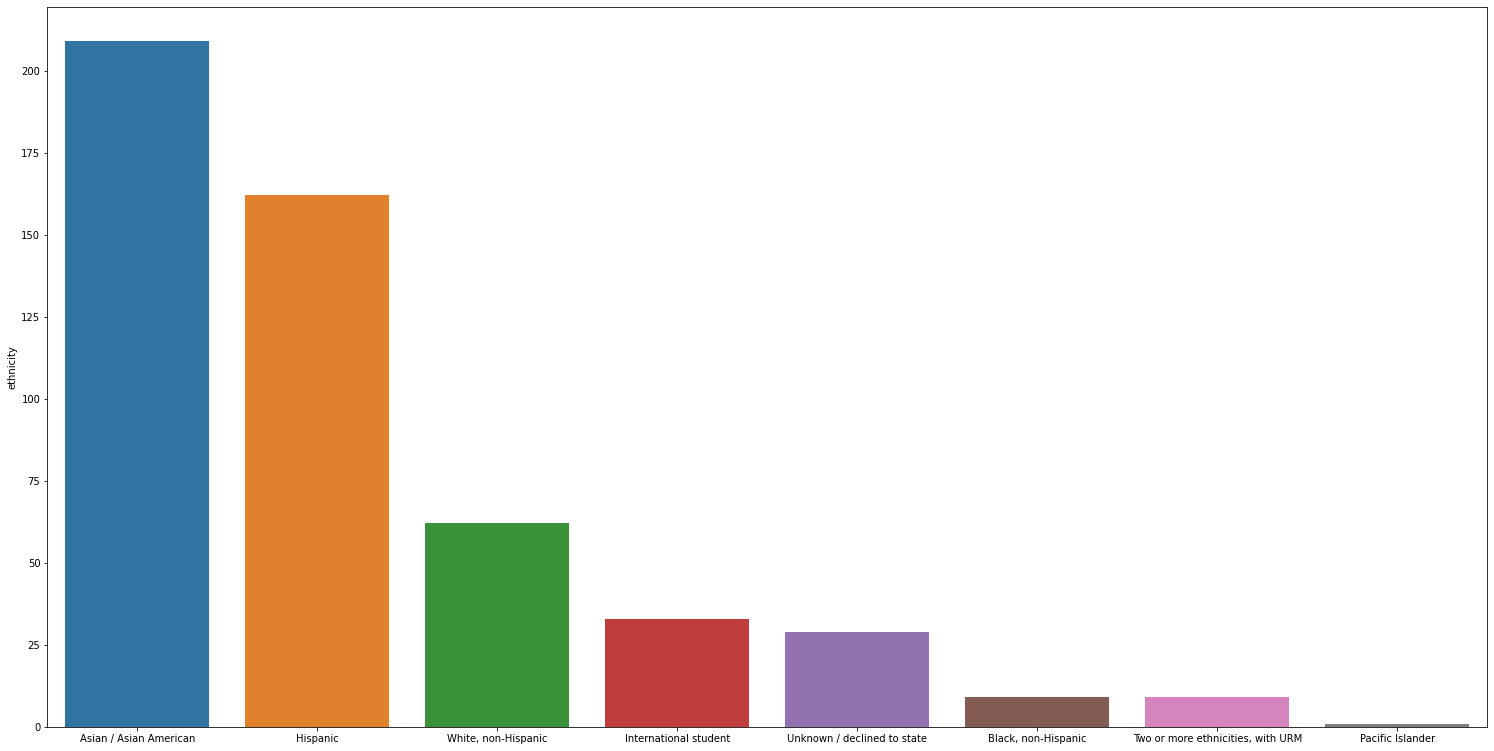

In [12]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_axes([0,0,1,1])
k = data.groupby(['mellon_id']).ethnicity.max().value_counts().index
val = data.groupby(['mellon_id']).ethnicity.max().value_counts()
sns.barplot(k, val)
plt.show()

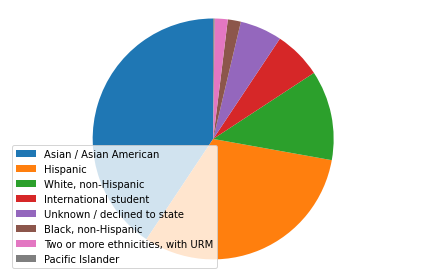

In [20]:
# # plt.pie(sizes = (val/val.sum())*100, labels = k)

# fig1, ax1 = plt.subplots()
# ax1.pie((val/val.sum())*100, labels=k, autopct='%1.1f%%',
#         shadow=True, startangle=90)
# ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# plt.show()


import matplotlib.pyplot as plt
# The slices will be ordered and plotted counter-clockwise.
labels = k
sizes = (val/val.sum())*100
patches, texts = plt.pie(sizes, startangle=90)
plt.legend(patches, labels, loc="best")
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.tight_layout()
plt.show()

# Gender

In [13]:
data.groupby(['mellon_id']).gender.max().value_counts()

F                              347
M                              155
Unknown / declined to state     12
Name: gender, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


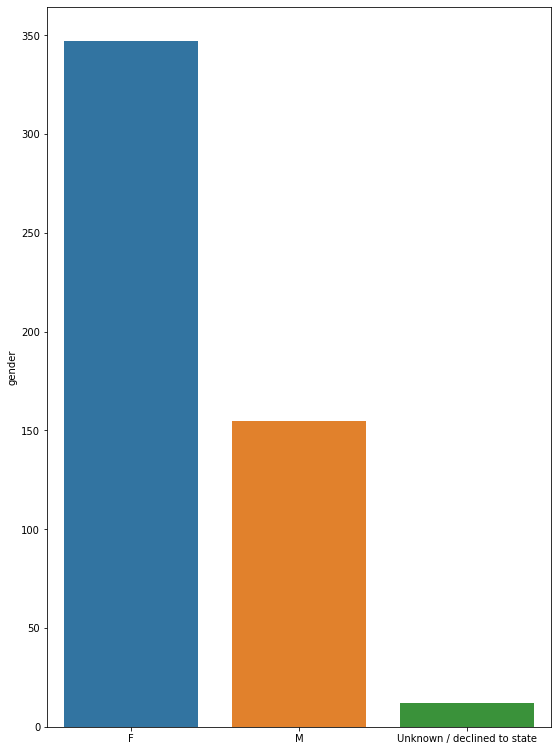

In [28]:
fig = plt.figure(figsize=(7,10))
ax = fig.add_axes([0,0,1,1])
k = data.groupby(['mellon_id']).gender.max().value_counts().index
val = data.groupby(['mellon_id']).gender.max().value_counts()
sns.barplot(k, val)
plt.show()

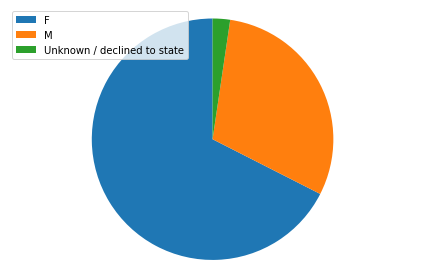

In [29]:
import matplotlib.pyplot as plt
# The slices will be ordered and plotted counter-clockwise.
labels = k
sizes = (val/val.sum())*100
patches, texts = plt.pie(sizes, startangle=90)
plt.legend(patches, labels, loc="best")
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.tight_layout()
plt.show()

# Year

In [15]:
data.groupby(['mellon_id']).application_status.max().value_counts()

Freshman                       342
Junior                         128
Sophomore                       24
Unknown / declined to state     12
Senior                           8
Name: application_status, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


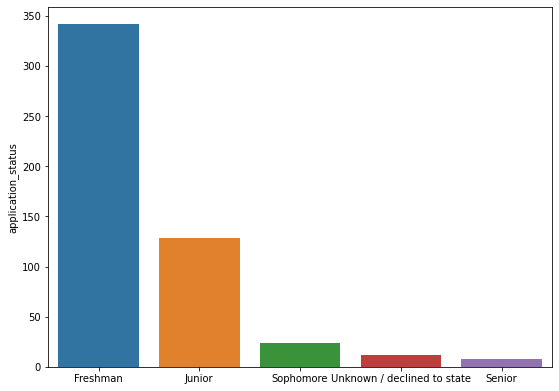

In [22]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_axes([0,0,1,1])
k = data.groupby(['mellon_id']).application_status.max().value_counts().index
val = data.groupby(['mellon_id']).application_status.max().value_counts()
sns.barplot(k, val)
plt.show()

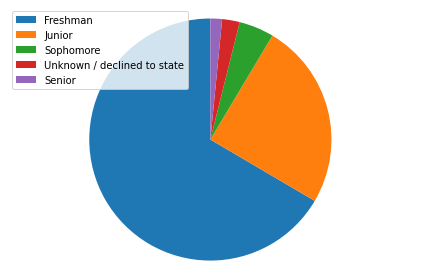

In [27]:
import matplotlib.pyplot as plt
# The slices will be ordered and plotted counter-clockwise.
labels = k
sizes = (val/val.sum())*100
patches, texts = plt.pie(sizes, startangle=90)
plt.legend(patches, labels, loc="best")
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.tight_layout()
plt.show()

# First generation

In [17]:
data.groupby(['mellon_id']).first_generation.max().value_counts()

1.0                            277
0.0                            225
Unknown / declined to state     12
Name: first_generation, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


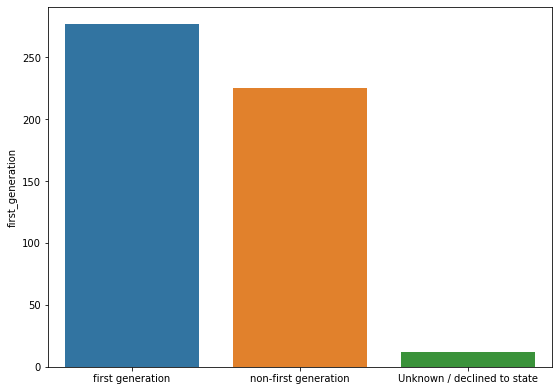

In [18]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_axes([0,0,1,1])
k = ['first generation', 'non-first generation', 'Unknown / declined to state']
val = data.groupby(['mellon_id']).first_generation.max().value_counts()
sns.barplot(k, val)
plt.show()

# Scores

In [19]:
data.groupby(['mellon_id']).revise_score.mean().value_counts()

0.000    343
1.000     56
2.000     52
0.500     16
1.500     12
1.750     12
0.250      8
0.125      7
1.250      4
0.750      4
Name: revise_score, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


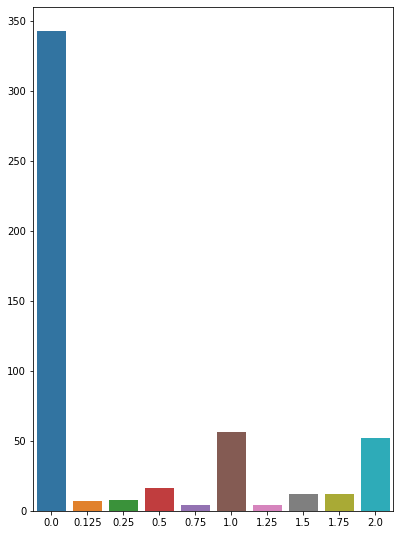

In [20]:
fig = plt.figure(figsize=(5,7))
ax = fig.add_axes([0,0,1,1])
k = list(data.groupby(['mellon_id']).revise_score.max().value_counts().index)
val = list(data.groupby(['mellon_id']).revise_score.max().value_counts())
sns.barplot(k, val)
plt.show()

<AxesSubplot:ylabel='Count'>

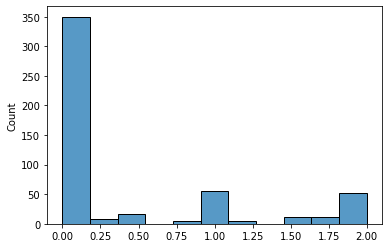

In [21]:
sns.histplot(list(data.groupby(['mellon_id']).revise_score.max()))

<AxesSubplot:ylabel='Count'>

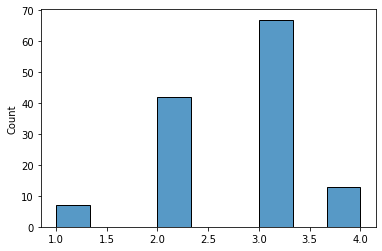

In [22]:
sns.histplot([len(x) for x in data.groupby(['session_id']).ethnicity.unique()])

In [7]:
diversity = data.groupby(['session_id']).ethnicity.unique()

In [8]:
diversity

session_id
7283_Professor    [White, non-Hispanic, Hispanic, Unknown / decl...
7285_Professor        [Asian / Asian American, White, non-Hispanic]
7287_Professor    [White, non-Hispanic, Asian / Asian American, ...
7288_Professor    [Asian / Asian American, Unknown / declined to...
7289_Professor                                           [Hispanic]
                                        ...                        
7376_apartment    [White, non-Hispanic, Unknown / declined to st...
7377_apartment    [Asian / Asian American, White, non-Hispanic, ...
7378_apartment    [Asian / Asian American, Hispanic, Black, non-...
7380_apartment    [Two or more ethnicities, with URM, White, non...
7388_apartment      [Asian / Asian American, International student]
Name: ethnicity, Length: 129, dtype: object

In [9]:
data = data.merge(diversity, on = ['session_id'], how= 'left')

In [10]:
data['diversity'] = [len(a) for a in data['ethnicity_y']]

In [11]:
data

,session_id,mellon_id,player_id,event_result,task,Primary code,event_start_time,revise_score,high_performance,female_members,female_maj,gender,ethnicity_x,application_status,first_generation,urm,first_language,ethnicity_y,diversity
0,7298_PartyVenue,173442,"{'userID1': '202618', 'nickname1': 'bean boi',...",what's up lads,PartyVenue,SMC,2019-09-28 17:11:18+00:00,0.0,0,4,1,F,Unknown / declined to state,Sophomore,0.0,0.0,English only,"[Unknown / declined to state, Asian / Asian Am...",3
1,7298_PartyVenue,202618,"{'userID1': '202618', 'nickname1': 'bean boi',...",hello,PartyVenue,SMC,2019-09-28 17:11:26+00:00,0.0,0,4,1,F,Asian / Asian American,Freshman,1.0,0.0,Non-English,"[Unknown / declined to state, Asian / Asian Am...",3
2,7298_PartyVenue,163093,"{'userID1': '202618', 'nickname1': 'bean boi',...",hi its too early for this,PartyVenue,SMC,2019-09-28 17:11:29+00:00,0.0,0,4,1,F,Asian / Asian American,Freshman,1.0,0.0,English/non-English,"[Unknown / declined to state, Asian / Asian Am...",3
3,7298_PartyVenue,173442,"{'userID1': '202618', 'nickname1': 'bean boi',...",bean boi i like ur name,PartyVenue,SMC,2019-09-28 17:11:32+00:00,0.0,0,4,1,F,Unknown / declined to state,Sophomore,0.0,0.0,English only,"[Unknown / declined to state, Asian / Asian Am...",3
4,7298_PartyVenue,202618,"{'userID1': '202618', 'nickname1': 'bean boi',...",thanks,PartyVenue,SMC,2019-09-28 17:11:35+00:00,0.0,0,4,1,F,Asian / Asian American,Freshman,1.0,0.0,Non-English,"[Unknown / declined to state, Asian / Asian Am...",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7363,7371_candidate,Isabella,"{'userID1': '187876', 'nickname1': 'Sabrina', ...",yes,candidate,SN,2019-10-03 23:18:38+00:00,0.0,0,3,1,Unknown / declined to state,Unknown / declined to state,Unknown / declined to state,Unknown / declined to state,Unknown / declined to state,Unknown / declined to state,"[Hispanic, Unknown / declined to state, Intern...",3
7364,7371_candidate,180275,"{'userID1': '187876', 'nickname1': 'Sabrina', ...",I agree,candidate,SN,2019-10-03 23:18:43+00:00,0.0,0,3,1,F,International student,Freshman,0.0,0.0,Non-English,"[Hispanic, Unknown / declined to state, Intern...",3
7365,7371_candidate,Isabella,"{'userID1': '187876', 'nickname1': 'Sabrina', ...","okay, we're good to submit then ?",candidate,CE,2019-10-03 23:18:54+00:00,0.0,0,3,1,Unknown / declined to state,Unknown / declined to state,Unknown / declined to state,Unknown / declined to state,Unknown / declined to state,Unknown / declined to state,"[Hispanic, Unknown / declined to state, Intern...",3
7366,7371_candidate,195466,"{'userID1': '187876', 'nickname1': 'Sabrina', ...",yes,candidate,SN,2019-10-03 23:18:55+00:00,0.0,0,3,1,F,Hispanic,Junior,0.0,1.0,Non-English,"[Hispanic, Unknown / declined to state, Intern...",3


(array([ 7.,  0.,  0., 42.,  0.,  0., 67.,  0.,  0., 13.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

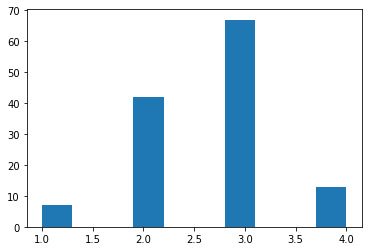

In [30]:
plt.hist(data.groupby('session_id')['diversity'].mean())

In [31]:
data.groupby(['diversity'])['Primary code '].value_counts()[1]

Primary code 
SSI     78
SMC     63
SESU    46
SN      35
CRF     30
CE      14
CM      12
CP       1
EM       1
Name: Primary code , dtype: int64

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


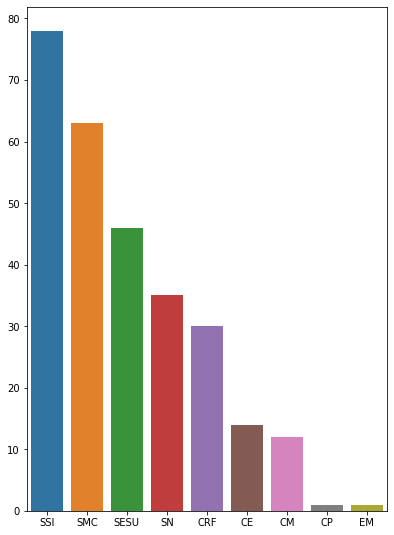

In [32]:
fig = plt.figure(figsize=(5,7))
ax = fig.add_axes([0,0,1,1])
k = list(data.groupby(['diversity'])['Primary code '].value_counts()[1].index)
val = list(data.groupby(['diversity'])['Primary code '].value_counts()[1])
sns.barplot(k, val)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


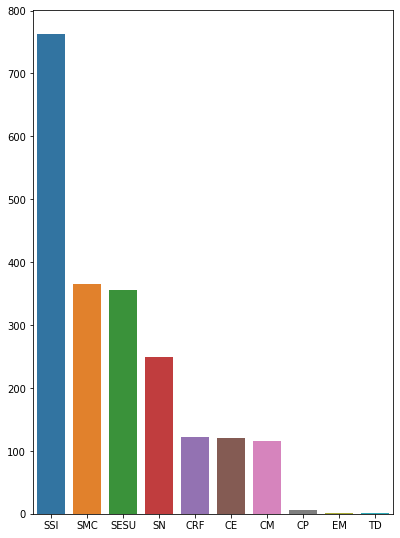

In [33]:
fig = plt.figure(figsize=(5,7))
ax = fig.add_axes([0,0,1,1])
k = list(data.groupby(['diversity'])['Primary code '].value_counts()[2].index)
val = list(data.groupby(['diversity'])['Primary code '].value_counts()[2])
sns.barplot(k, val)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


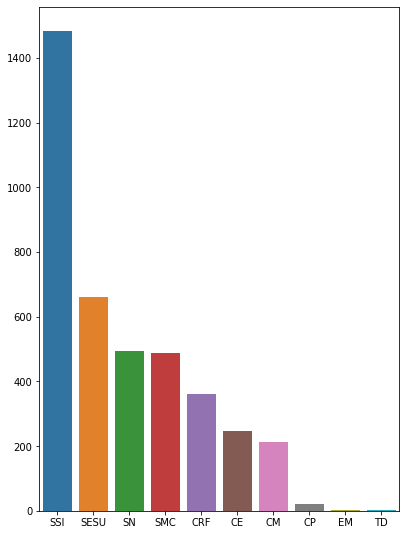

In [34]:
fig = plt.figure(figsize=(5,7))
ax = fig.add_axes([0,0,1,1])
k = list(data.groupby(['diversity'])['Primary code '].value_counts()[3].index)
val = list(data.groupby(['diversity'])['Primary code '].value_counts()[3])
sns.barplot(k, val)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


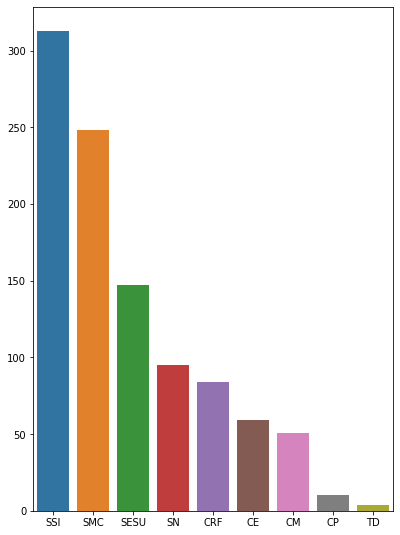

In [35]:
fig = plt.figure(figsize=(5,7))
ax = fig.add_axes([0,0,1,1])
k = list(data.groupby(['diversity'])['Primary code '].value_counts()[4].index)
val = list(data.groupby(['diversity'])['Primary code '].value_counts()[4])
sns.barplot(k, val)
plt.show()

In [36]:
data = data[data['Primary code '] != 'EM']
data = data[data['Primary code '] != 'TD']

In [37]:
data['soc_cog'] = [k[0] for k in data['Primary code ']]

In [38]:
data['soc_cog']

0       S
1       S
2       S
3       S
4       S
       ..
7363    S
7364    S
7365    C
7366    S
7367    C
Name: soc_cog, Length: 7353, dtype: object

In [39]:
df2 = (data.groupby(['session_id', 'diversity']).agg({'Primary code ': 'value_counts'}).unstack(fill_value=0)).groupby('diversity').agg('mean')

In [40]:
df2

Primary code                                            \
Primary code             CE        CM        CP       CRF       SESU   
diversity                                                              
1                  2.000000  1.714286  0.142857  4.285714   6.571429   
2                  2.857143  2.738095  0.142857  2.904762   8.476190   
3                  3.686567  3.164179  0.313433  5.388060   9.850746   
4                  4.538462  3.923077  0.769231  6.461538  11.307692   

                                               
Primary code         SMC        SN        SSI  
diversity                                      
1               9.000000  5.000000  11.142857  
2               8.714286  5.952381  18.166667  
3               7.298507  7.388060  22.149254  
4              19.076923  7.307692  24.076923

In [41]:
for i in [0, 1, 2, 3]:
    df2.iloc[i] = df2.iloc[i]/df2.iloc[i].sum()

<AxesSubplot:xlabel='diversity'>

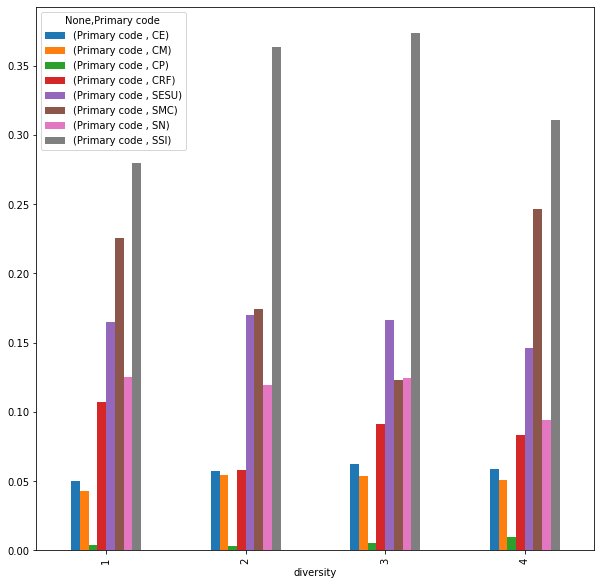

In [42]:
df2.plot.bar(figsize = (10,10))

In [43]:
df3 = (data.groupby(['session_id', 'diversity']).agg({'soc_cog': 'value_counts'}).unstack(fill_value=0)).groupby('diversity').agg('mean')

In [44]:
df3

soc_cog           
soc_cog            C          S
diversity                      
1           8.142857  31.714286
2           8.642857  41.309524
3          12.552239  46.686567
4          15.692308  61.769231

In [45]:
for i in [0, 1, 2, 3]:
    df3.iloc[i] = df3.iloc[i]/df3.iloc[i].sum()

<AxesSubplot:xlabel='diversity', ylabel='social/cognitive proportions'>

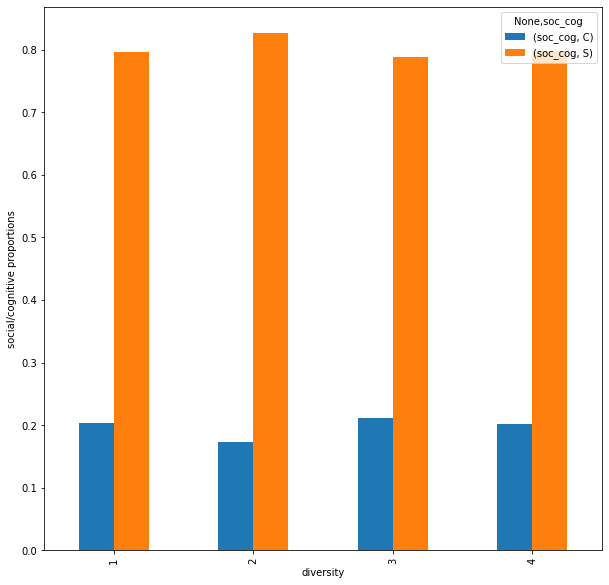

In [46]:
df3.plot.bar(figsize = (10,10), ylabel='social/cognitive proportions')

In [47]:
df3

soc_cog          
soc_cog           C         S
diversity                    
1          0.204301  0.795699
2          0.173022  0.826978
3          0.211892  0.788108
4          0.202582  0.797418

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


KeyError: ('English only', 'SSI')

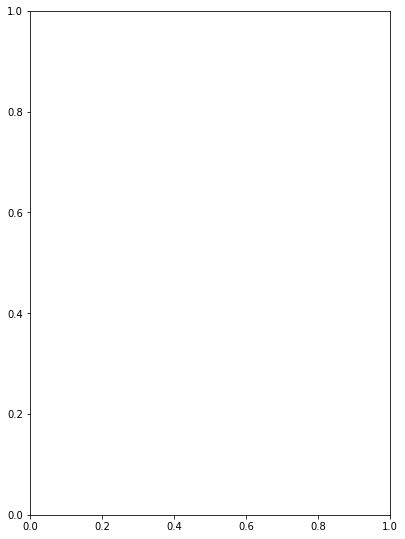

In [48]:
fig = plt.figure(figsize=(5,7))
ax = fig.add_axes([0,0,1,1])
k = list(data.groupby(['first_language'])['Primary code '].value_counts().index)
val = list(data.groupby(['first_language'])['Primary code '].value_counts())
sns.barplot(k, val)
plt.show()

In [20]:
data['first_language'].value_counts()/data.groupby('mellon_id')['first_language'].max().value_counts()

English only           15.908451
English/non-English    14.923077
Non-English            11.855263
Name: first_language, dtype: float64

In [17]:
data.groupby('mellon_id')['first_language'].max().value_counts()

English/non-English    208
Non-English            152
English only           142
Name: first_language, dtype: int64

In [18]:
data['first_language'].value_counts()

English/non-English    3104
English only           2259
Non-English            1802
Name: first_language, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


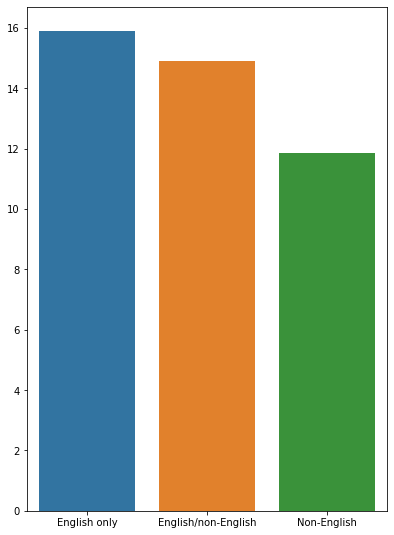

In [21]:
fig = plt.figure(figsize=(5,7))
ax = fig.add_axes([0,0,1,1])
k = list((data['first_language'].value_counts()/data.groupby('mellon_id')['first_language'].max().value_counts()).index)
val = list(data['first_language'].value_counts()/data.groupby('mellon_id')['first_language'].max().value_counts())
sns.barplot(k, val)
plt.show()

In [25]:
 m = np.arange(180)

In [68]:
m%60

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59,  0,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41,
       42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58,
       59,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53, 54, 55, 56, 57, 58, 59])

Text(0, 0.5, 'minute number')

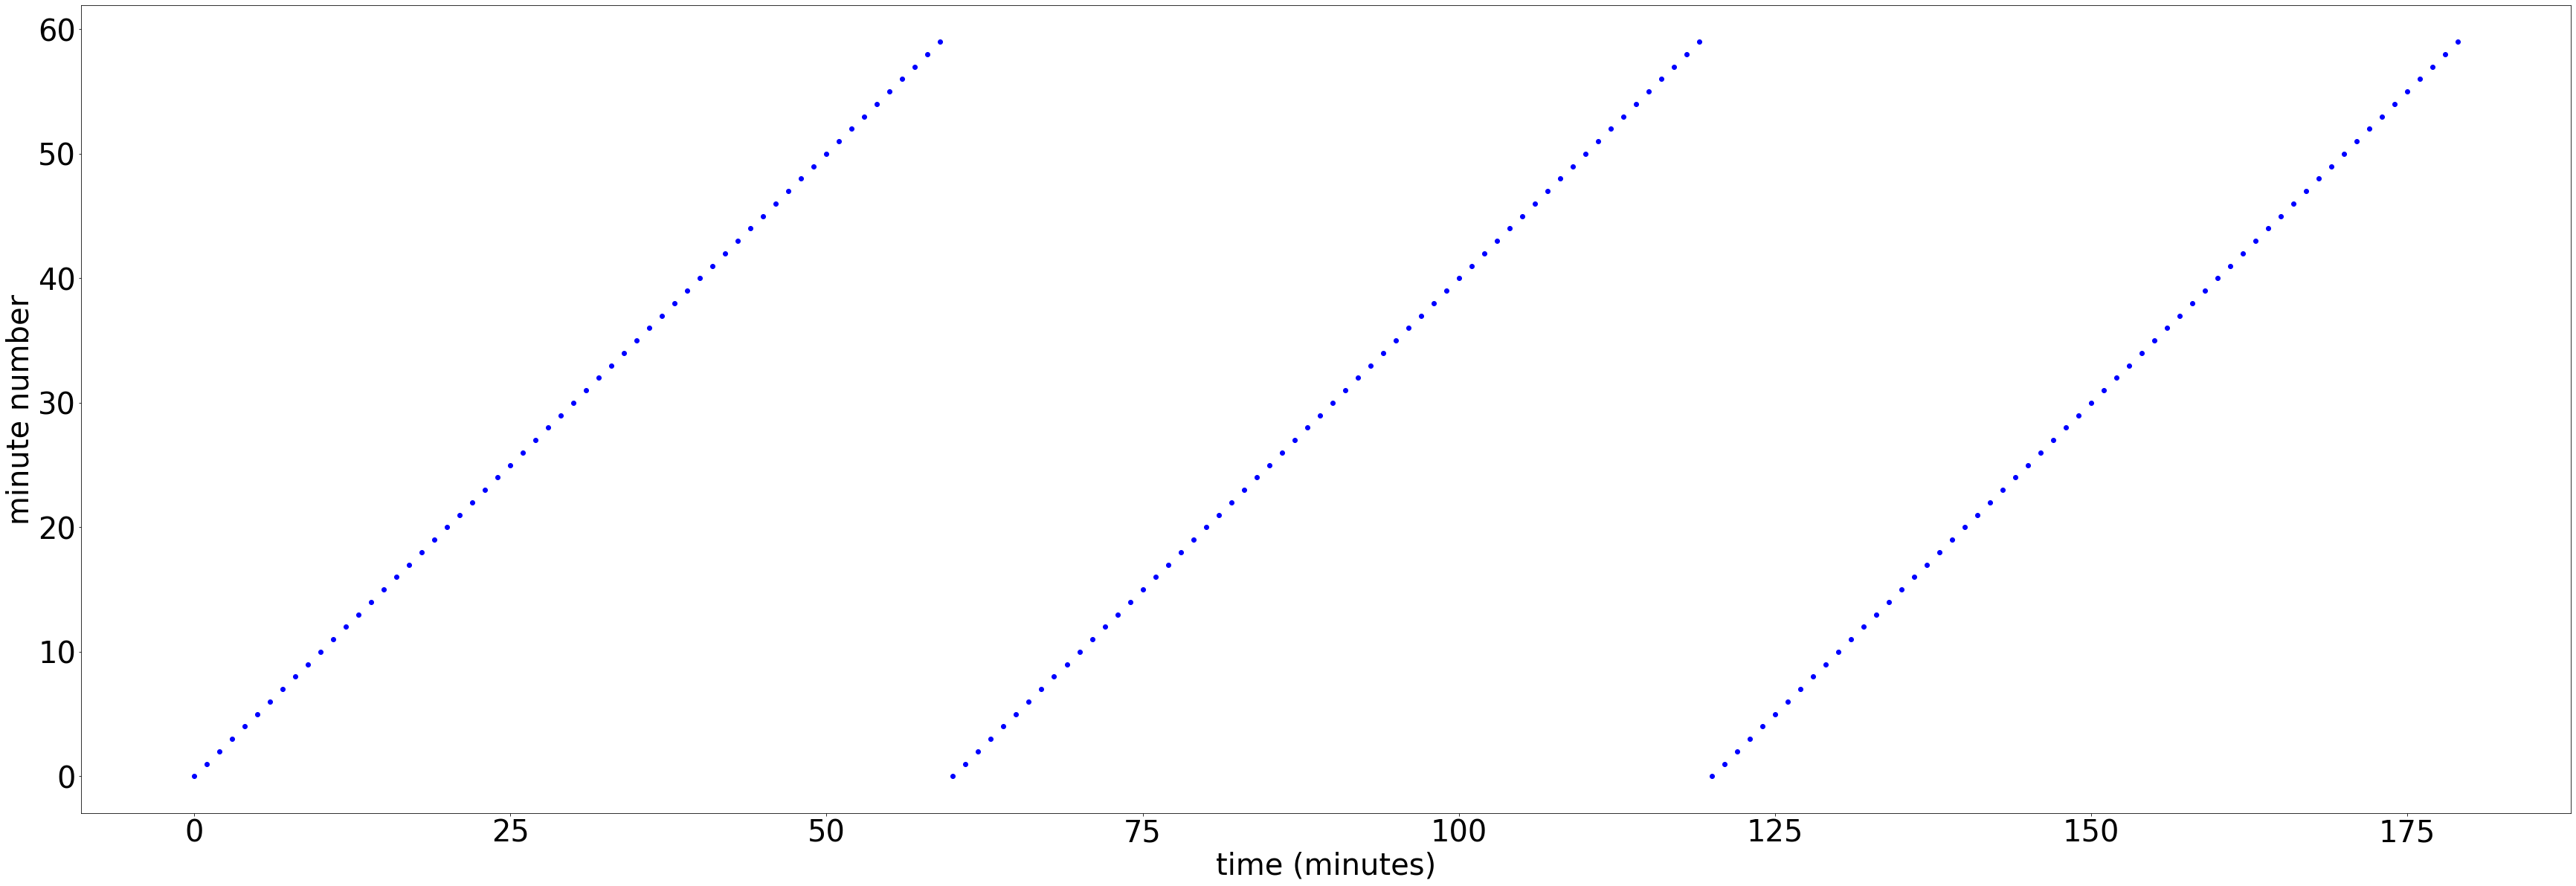

In [67]:
plt.rcParams['font.size'] = '40'
plt.figure(figsize=(60,20))
plt.scatter(m, m%60, c= 'blue')
plt.xlabel('time (minutes)')
plt.ylabel('minute number')

TypeError: array() missing required argument 'object' (pos 1)

In [43]:
rec = []
for i in range(60):
    rec.append([i,i])
    rec.append([i+60, i+60])
    rec.append([i+120, i+120])
    rec.append([i,i+60])
    rec.append([i+60,i])
    rec.append([i,i+120])
    rec.append([i+120,i])
    rec.append([i+60,i+120])
    rec.append([i+120,i+60])

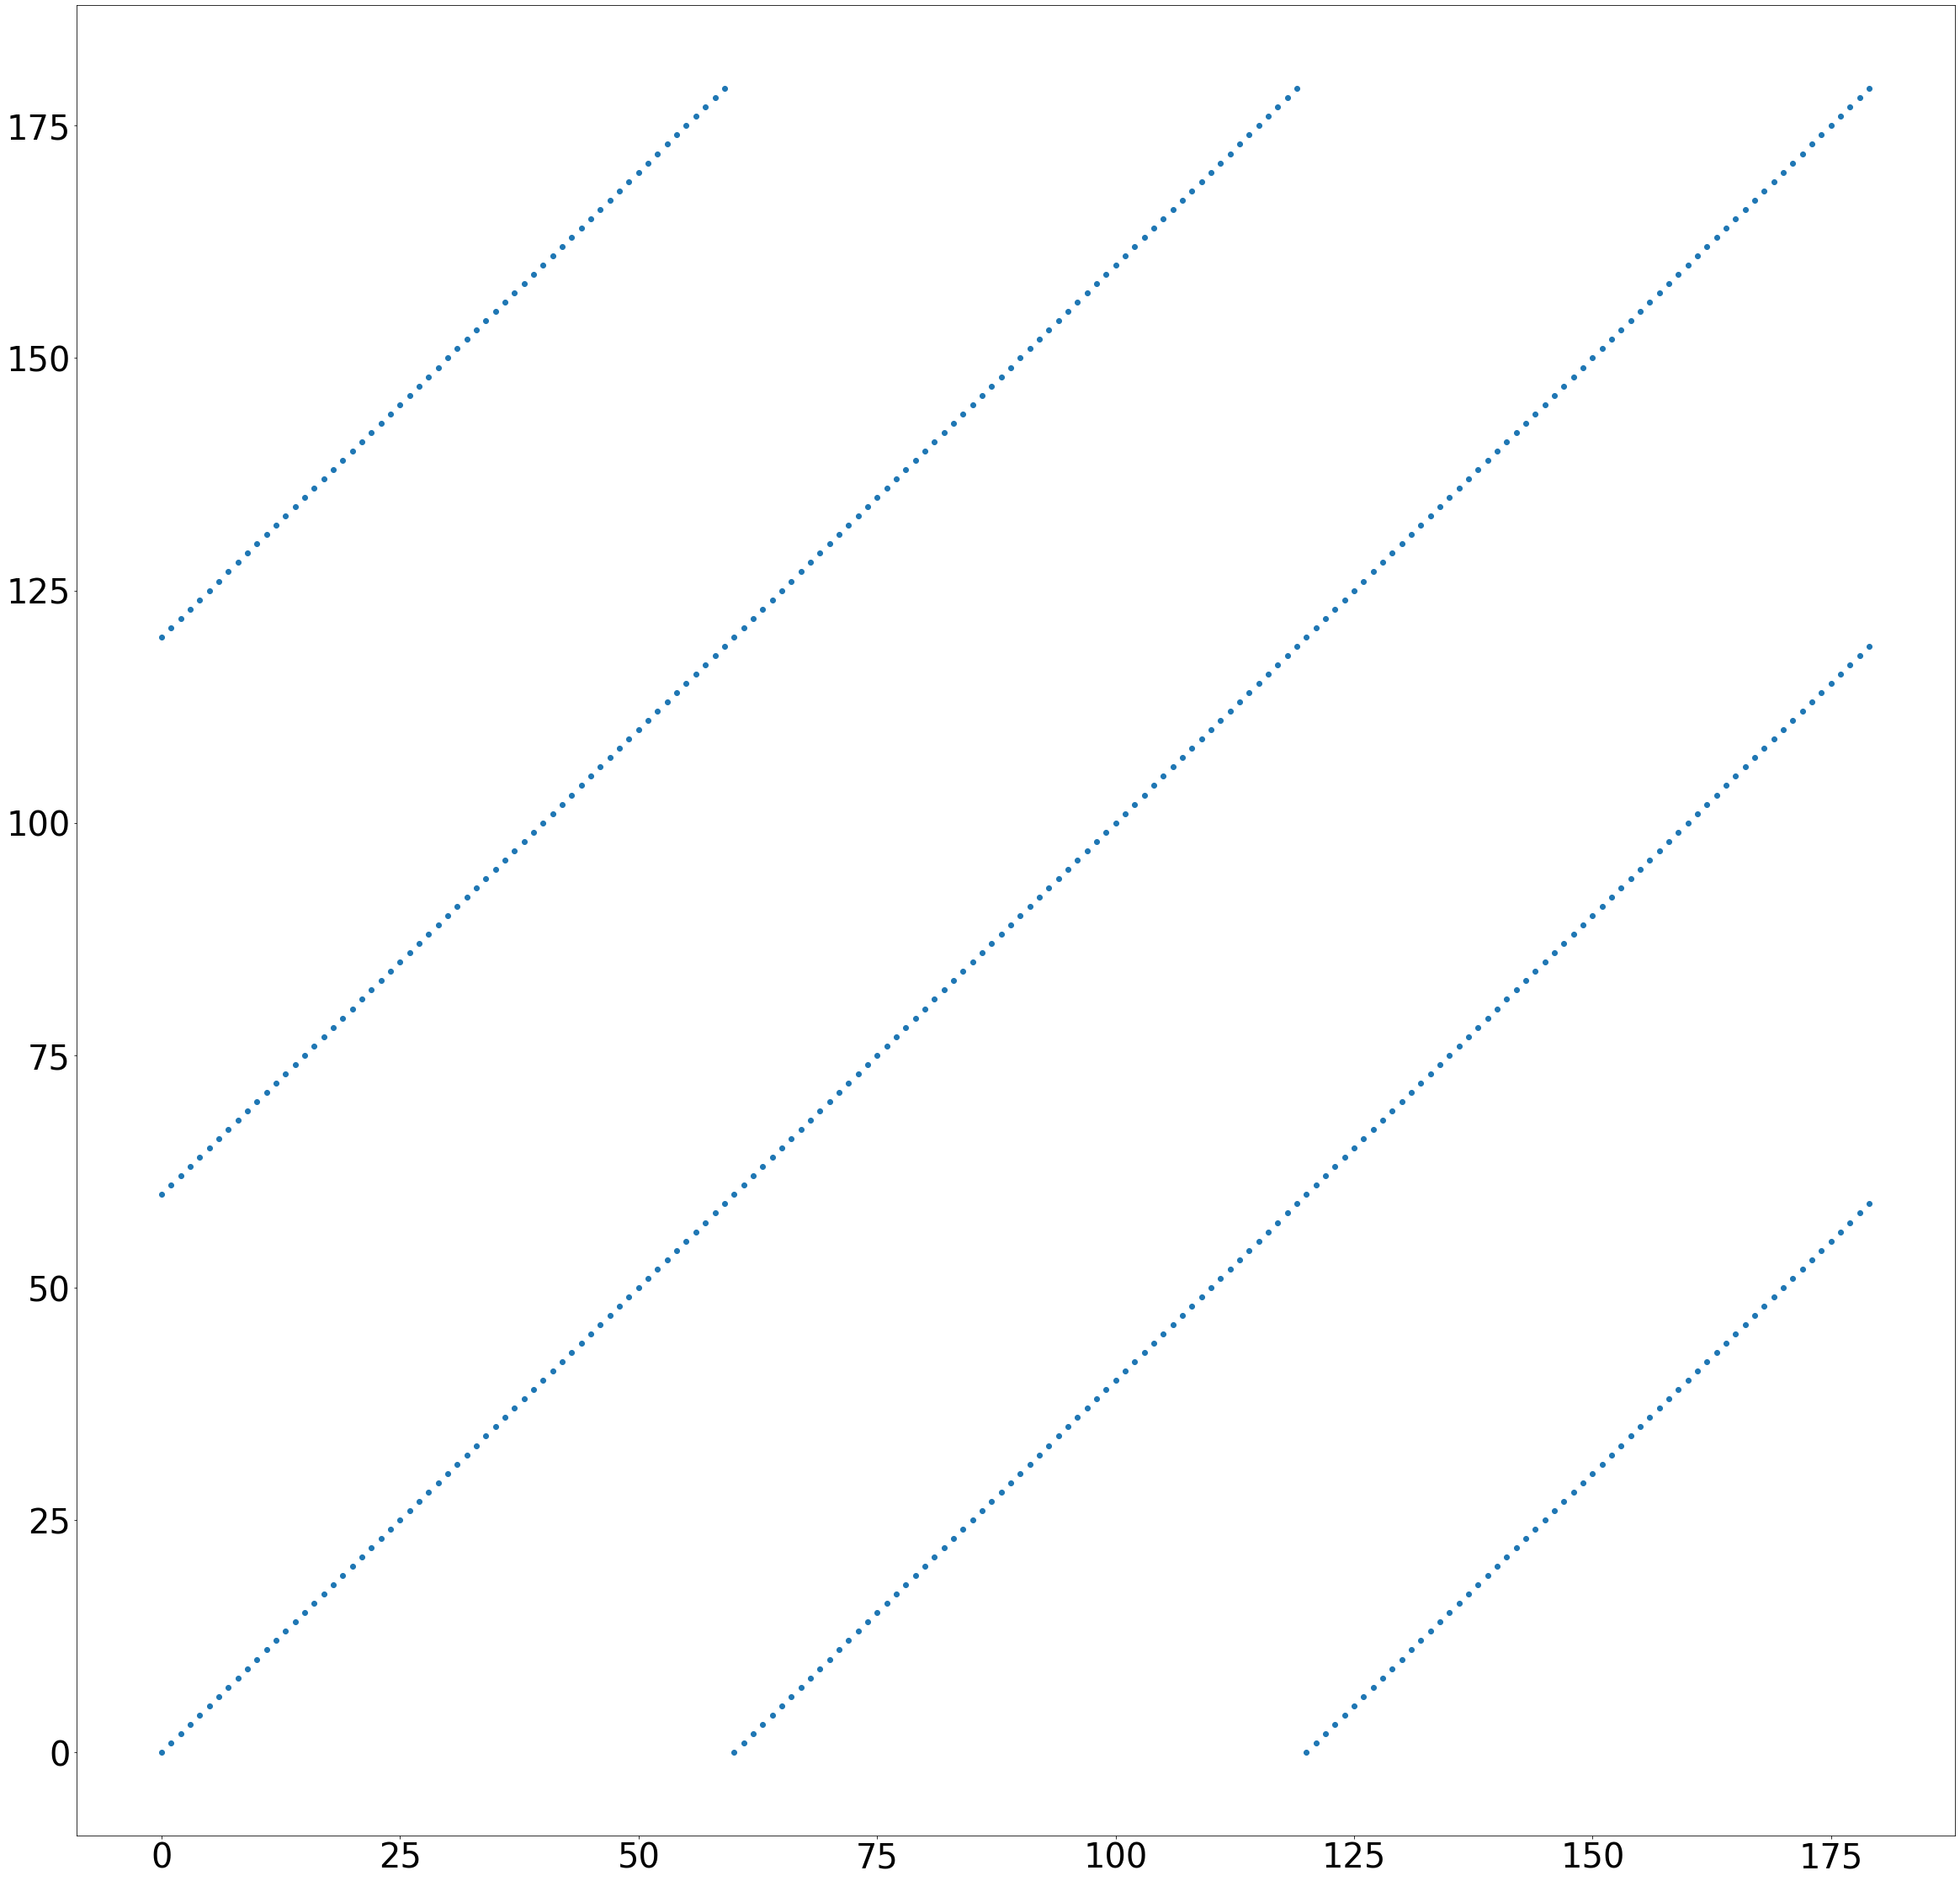

In [70]:
rec = np.array(rec)
plt.figure(figsize=(40,40))
plt.scatter(rec[:,0], rec[:,1])

In [71]:
 m = np.arange(180)

Text(0, 0.5, 'hour number')

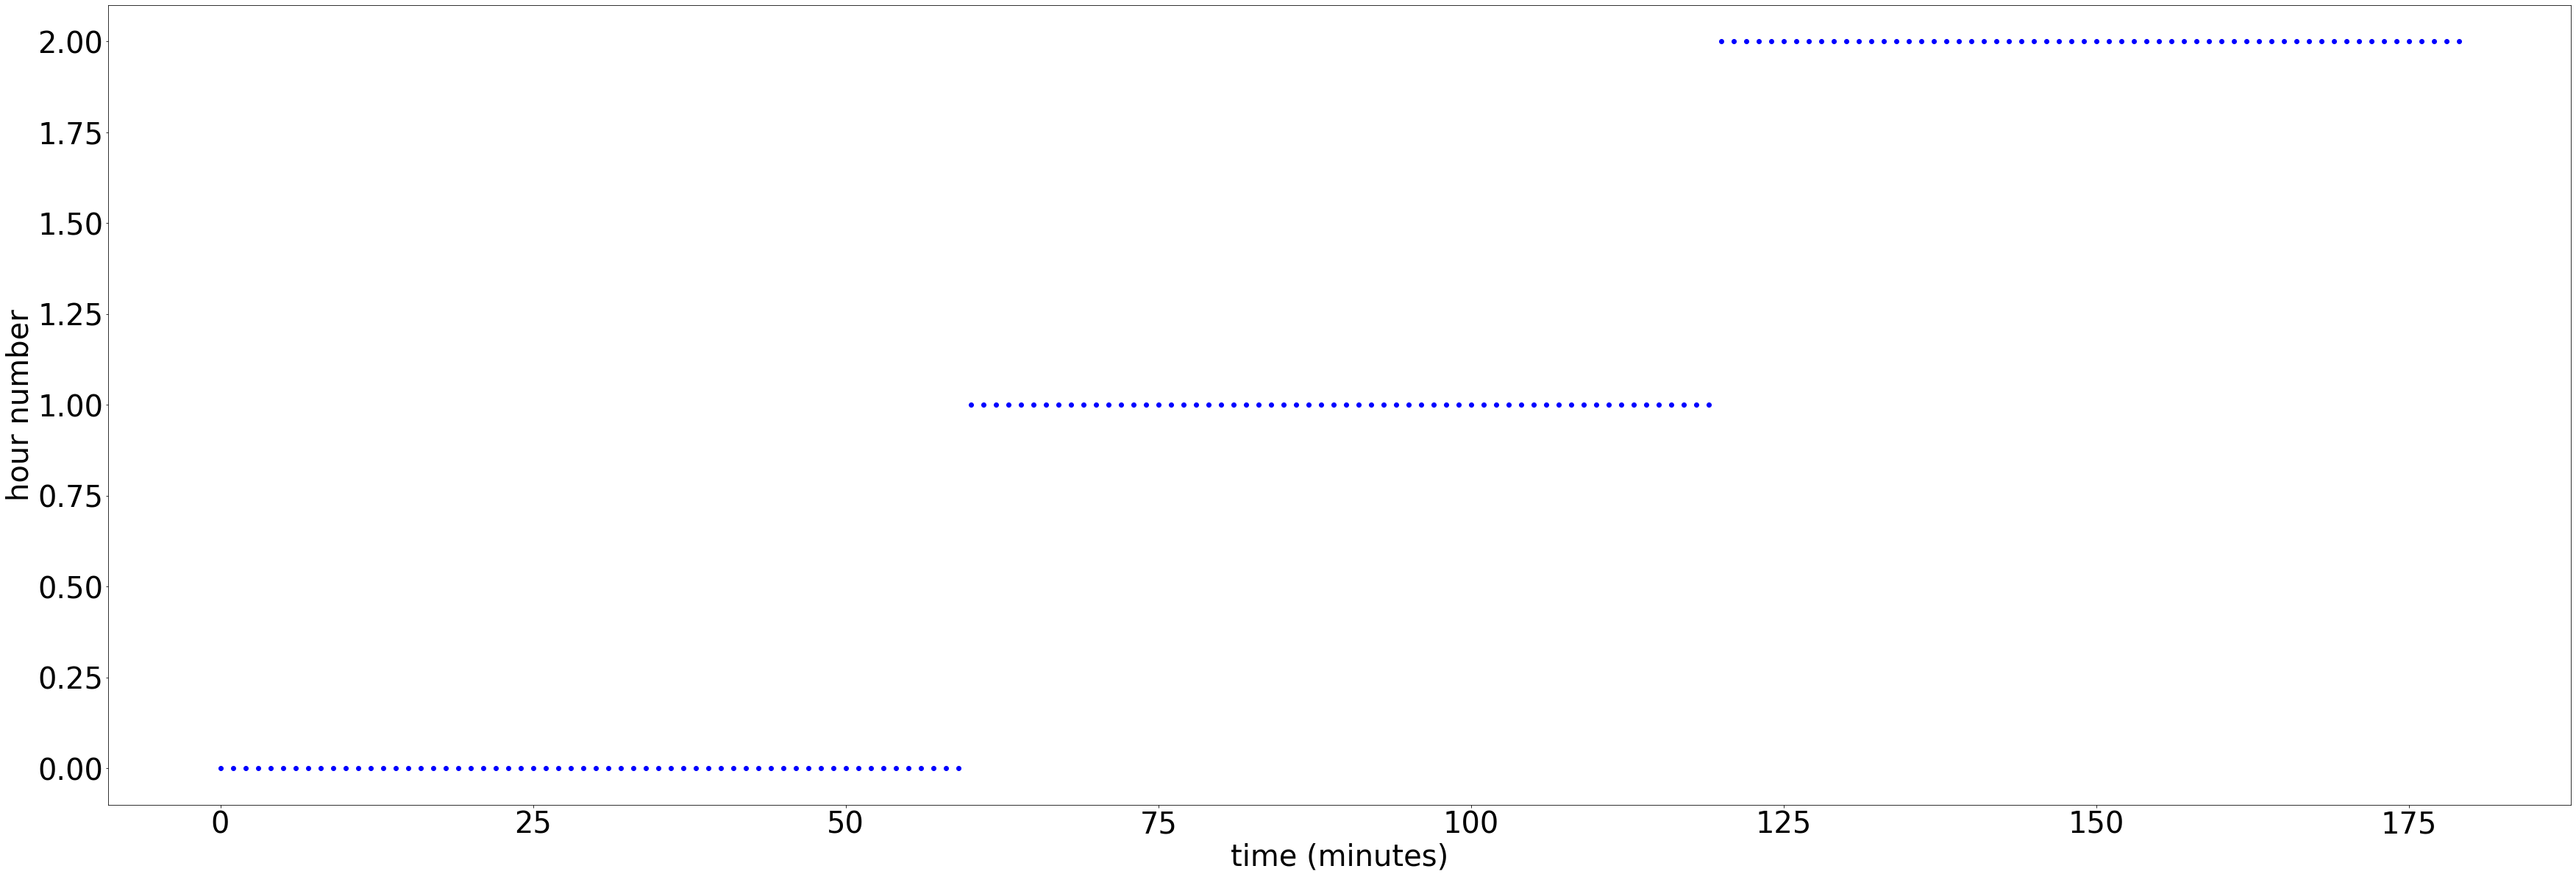

In [76]:
plt.rcParams['font.size'] = '40'
plt.figure(figsize=(60,20))
plt.scatter(m, (m/60).astype(int), c= 'blue')
plt.xlabel('time (minutes)')
plt.ylabel('hour number')

In [81]:
h = []
for i in range(3):
    for j in range(60):
        h.append([i*60+j, i*60])
        h.append([i*60, i*60+j])

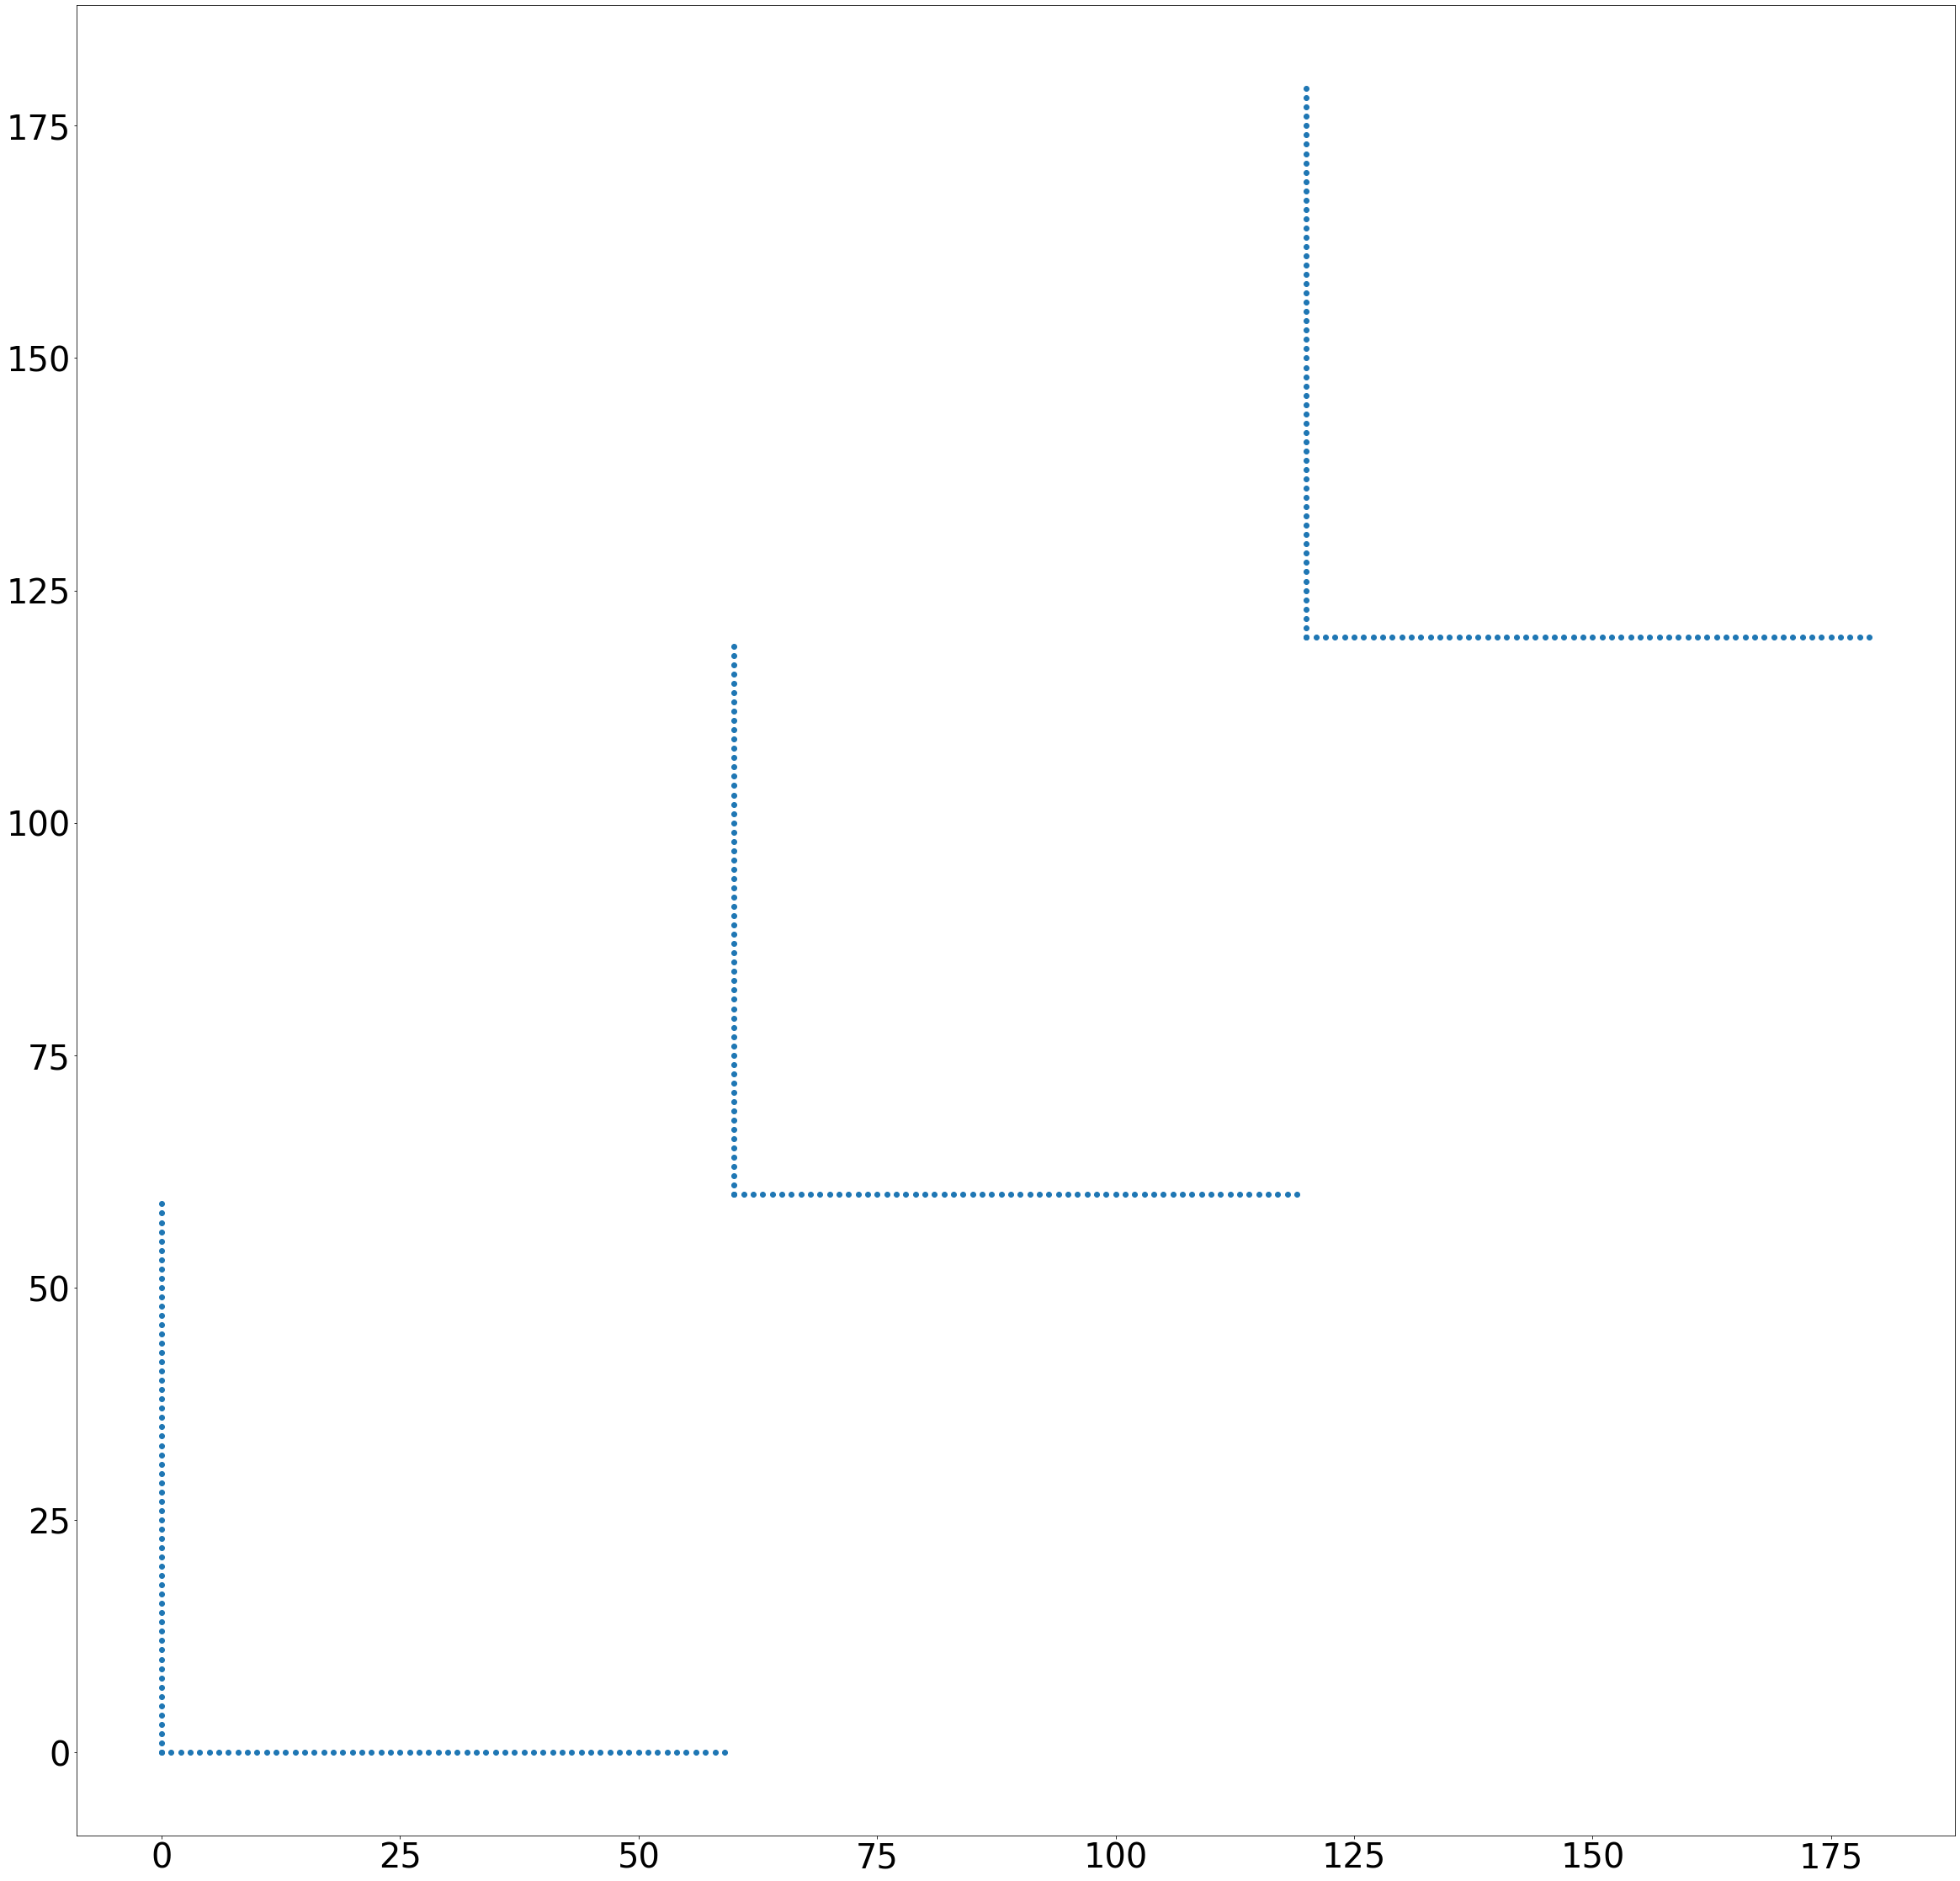

In [82]:
h = np.array(h)
plt.figure(figsize=(40,40))
plt.scatter(h[:,0], h[:,1])